### TESLA STOCK PREDICTIONS [2014-2018]

In [16]:
#Importing all the necessary libraries
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from datetime import datetime
plotly.tools.set_credentials_file(username='replace username', api_key='replace key')

In [3]:
#Getting the TESLA stock data from morningstar 
start = dt.datetime(2014,1,1)
end = dt.datetime(2018,4,10)
df = web.DataReader('TSLA', 'morningstar', start, end)
df.to_csv('tsla.csv')

In [17]:
#Reading from the tesla file
tesla = pd.read_csv('tsla.csv')
tesla.head()

,Symbol,Date,Close,High,Low,Open,Volume
0,TSLA,2014-01-01,150.429,150.4290,150.429,150.429,0
1,TSLA,2014-01-02,150.100,152.4769,146.550,149.800,6195355
2,TSLA,2014-01-03,149.560,152.1900,148.601,150.000,4698839
3,TSLA,2014-01-06,147.000,150.4000,145.240,150.000,5367320
4,TSLA,2014-01-07,149.360,150.4000,145.250,147.580,5041806


In [18]:
#Checking for what is the type of columns and also converting date colume into datetime to extract year from the same. 
tesla.dtypes
tesla['Date'] = pd.to_datetime(tesla['Date'])

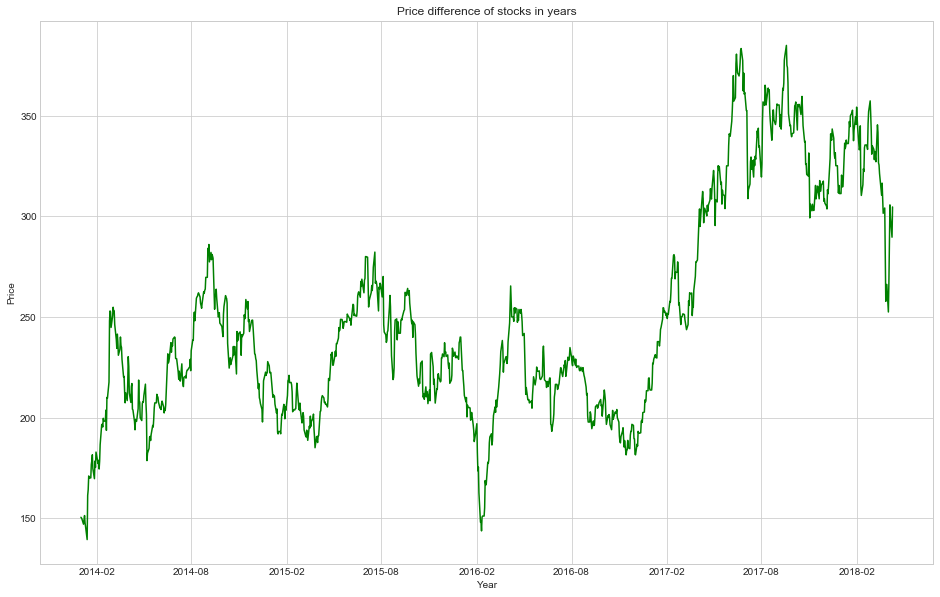

In [19]:
#Plot showing price variations of stocks in different years 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,10))
plt.plot(tesla['Date'],tesla['Close'], color='green')
plt.ylabel('Price')
plt.xlabel('Year')
plt.title('Price difference of stocks in years')
plt.show()

In [20]:
#Candlestick graph made with plotly indicating all open,close and high low points in a paticular day.
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime
trace = go.Candlestick(x=tesla.Date,
                       open=tesla.Open,
                       high=tesla.High,
                       low=tesla.Low,
                       close=tesla.Close)
data = [trace]
py.iplot(data, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~bhavya_269/0 or inside your plot.ly account where it is named 'simple_candlestick'


In [21]:
#Getting the data of Tesla's competitors to get an idea of its stock price position relative to them.
start = dt.datetime(2014,1,1)
end = dt.datetime(2018,4,10)
general_motors = web.DataReader("GM", "morningstar", start, end)
ford_motor = web.DataReader('F', 'morningstar', start, end)

In [22]:
general_motors.to_csv('general.csv')
ford_motor.to_csv('ford.csv')

In [23]:
general = pd.read_csv('general.csv')
general['Date'] = pd.to_datetime(general['Date'])
ford = pd.read_csv('ford.csv')
ford['Date'] = pd.to_datetime(ford['Date'])

Comparing tesla's price with its competitors.
Here we can clearly see that ford has been quite a constant company in terms of its share price however tesla and general motors.

Text(0.5,1,'Stock comparison between Ford, GM and Tesla')

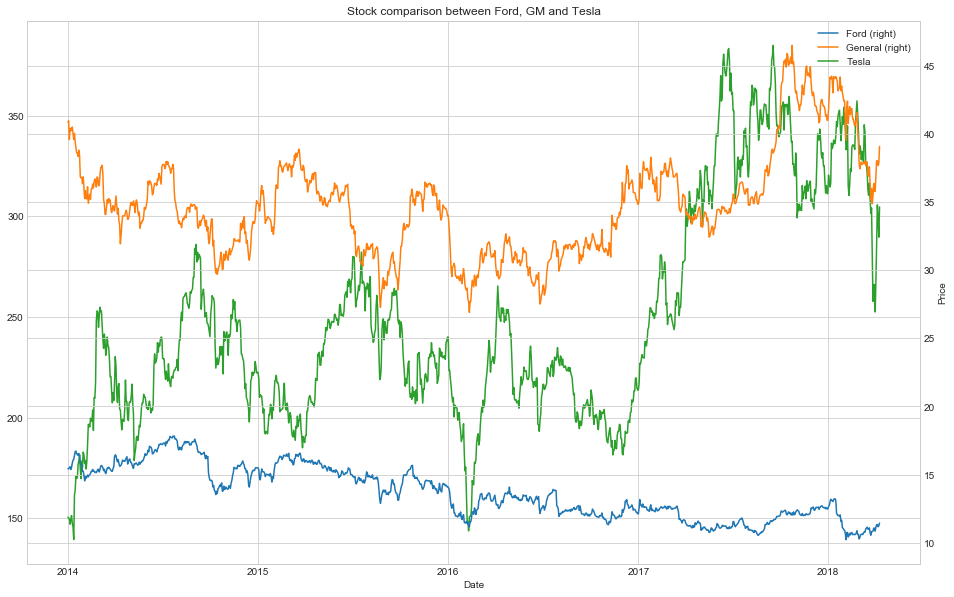

In [24]:
plt.style.use('seaborn-whitegrid')
stocks = pd.DataFrame({"Date": tesla['Date'],"General": general["Close"],
                      "Tesla": tesla["Close"],
                      "Ford": ford["Close"]})

stocks.index = stocks.Date
del stocks['Date']
stocks.head()
stocks.plot(secondary_y = ['General', 'Ford'],grid=True, figsize=(16,10))
plt.ylabel('Price')
plt.title('Stock comparison between Ford, GM and Tesla')

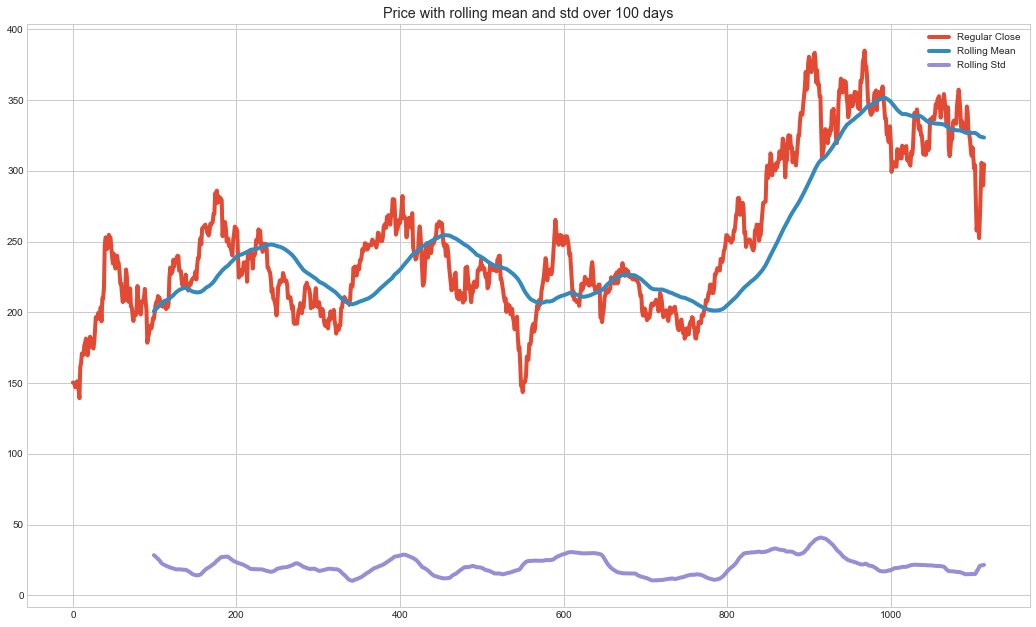

In [58]:
#Checking the data distribution for stationarity.
plt.figure(figsize=(16,10))
tesla['Close'].plot(label='Regular Close')
tesla['Close'].rolling(window=100).mean().plot(label='Rolling Mean')
tesla['Close'].rolling(window=100).std().plot(label='Rolling Std')
plt.title('Price with rolling mean and std with window of 100')
plt.legend()

In [6]:
#Importing all the necessary libraries
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [25]:
tesla['log_price'] = np.log(tesla['Close'])

Dickey-fuller-test to check if the stock price data is stationary or not.
As test statistics is greater than all the critical values it says that we do not have enough evidence to reject null hypothesis and thus the data is non-stationary. Therefore we will have to make it stationary.

In [26]:
#p value > 0.05 so not stationary
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('tsla.csv', header=0)
X = tesla['log_price'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.669292
p-value: 0.079505
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


We try to do the first order differencing of the the data and then found out that the test statistic value is much
less than the cricial value hence proving that we have enough evidence to reject null hypothesis thus the data is stationary now. We can see the same in the below plot which says that the data is almost stationary.

In [82]:
#p value > 0.05 so not stationary
from pandas import Series
from statsmodels.tsa.stattools import adfuller
X2 = tesla['log_price'].diff()[1:]
X2 = X2.values
result = adfuller(X2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -31.962740
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [27]:
X1 = tesla['log_price'].diff()[1:]

Now after we have made the dataset stationary with first order differencing so the value of d=1 and we can move ahead with the rest of our predictions 

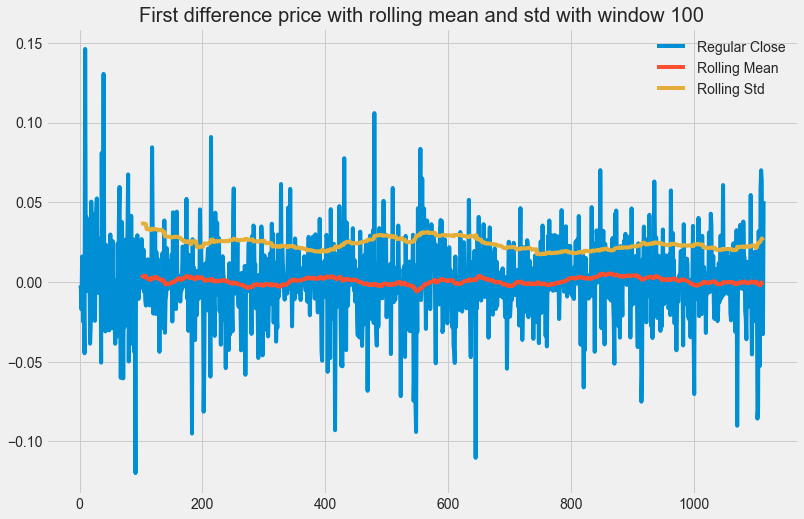

In [85]:
#As the below plot shows that with differencing of order 1 we were able to make the data stationary that means we have 
#a model of I(1)
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
X1.plot(label='Regular Close')
X1.rolling(window=100).mean().plot(label='Rolling Mean')
X1.rolling(window=100).std().plot(label='Rolling Std')
plt.title('First difference price with rolling mean and std with window 100')
plt.legend()

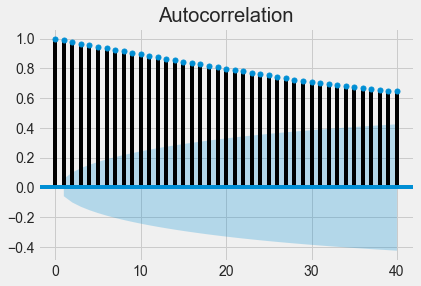

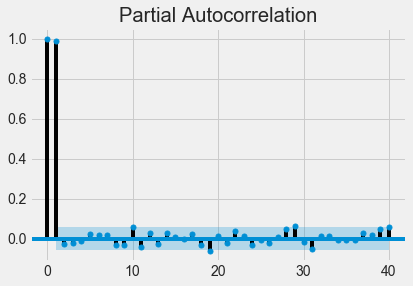

In [157]:
#Plotting the PACF and ACF plots to get values of p and q
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(tesla['log_price'], lags = 40)
plt.show()
plot_pacf(tesla['log_price'], lags = 40)
plt.show()

In [33]:
#As I decided on p = 1 and d = 1,. I found out that the best model came out to be with pdq = 101 with the least AIC vale 
price_matrix=tesla['log_price'].as_matrix()
model = ARIMA(price_matrix, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1115
Model:                     ARMA(1, 1)   Log Likelihood                2510.605
Method:                       css-mle   S.D. of innovations              0.025
Date:                Thu, 03 May 2018   AIC                          -5013.210
Time:                        20:53:12   BIC                          -4993.143
Sample:                             0   HQIC                         -5005.623
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4688      0.109     50.093      0.000       5.255       5.683
ar.L1.y        0.9935      0.004    277.387      0.000       0.986       1.001
ma.L1.y        0.0433      0.030      1.458      0.1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



As the ACF plot is following a geometric distribution we can say that it is an AR process. 

In [35]:
new_tesla = pd.concat([tesla['Date'], tesla['log_price']], axis = 1)

In [36]:
train = new_tesla[(new_tesla['Date'] > '2014-01-01') & (new_tesla['Date'] <= '2017-12-31')]
test = new_tesla[(new_tesla['Date'] > '2017-12-31')] 

In [39]:
forecast = model_fit.forecast(steps=10)
print ('Predicted log prices:', forecast[0])
print ('Confidence Intervals for values:', forecast[2])

Predicted log prices: [5.72000923 5.71838142 5.71676416 5.71515738 5.71356101 5.71197499
 5.71039924 5.70883371 5.70727832 5.70573302]
Confidence Intervals for values: [[5.67020547 5.76981299]
 [5.64663973 5.79012311]
 [5.62856621 5.80496211]
 [5.6132904  5.81702436]
 [5.59980109 5.82732093]
 [5.58758597 5.83636401]
 [5.57634241 5.84445607]
 [5.56587372 5.8517937 ]
 [5.55604334 5.8585133 ]
 [5.5467518  5.86471424]]


In [41]:
test.head(10)

,Date,log_price
1043,2018-01-01,5.740918
1044,2018-01-02,5.769976
1045,2018-01-03,5.759690
1046,2018-01-04,5.751366
1047,2018-01-05,5.757576
1048,2018-01-08,5.818331
1049,2018-01-09,5.810212
1050,2018-01-10,5.813533
1051,2018-01-11,5.822898
1052,2018-01-12,5.817766


After forecasting around 10 values with the model I made, I found out that the actual values are well in the confidence interval.